In [1]:
import sys
import numpy as np
import scipy as sp
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%pylab inline
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.utils.py3compat import annotate
from IPython.display import display
#from ipywidgets import FloatSlider
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


------
Import Functions, create a one-dimensional function

In [2]:
from FIVOA.Functions import *

In [3]:
f3 = F3OneDimensional.F3OneDimensional()

Import Point, create a point for tesing purposes

In [4]:
from FIVOA.Point import *

In [5]:
test_point = Point(1, [2])
test_point_optimum = Point(1, [3])

Get the value of the function at the point

In [6]:
print f3.value_at(test_point)
print f3.gradient_at(test_point)
print f3.value_at(test_point_optimum)
print f3.gradient_at(test_point_optimum)

1
-2
0
0


Import Drawer, draw the graph of the function

In [7]:
from FIVOA.Drawing import *

In [8]:
drawer = Drawer.Drawer()

In [9]:
drawer.add_function(f3)

In [10]:
drawer.add_point(test_point)

In [11]:
from FIVOA import *

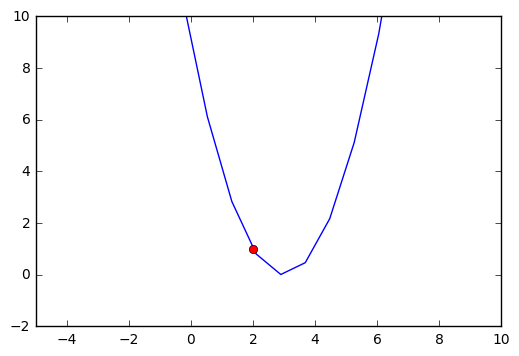

In [12]:
drawer.draw_2D_graph(-5,10,-2,10,20)

In [13]:
f1 = F1RosenbrockBananaFunction.F1RosenbrockBananaFunction()

In [14]:
elements = []
elements.append(1)
elements.append(1)
print elements

[1, 1]


In [15]:
test_point_rosenbrock_optimum = Point.Point(2, elements)
drawer2 = Drawer.Drawer()
drawer2.add_function(f1)
drawer2.add_point(test_point_rosenbrock_optimum)

In [16]:
cmap_choices = {
    'Accent': 'Accent',
    'Accent_r': 'Accent_r'}

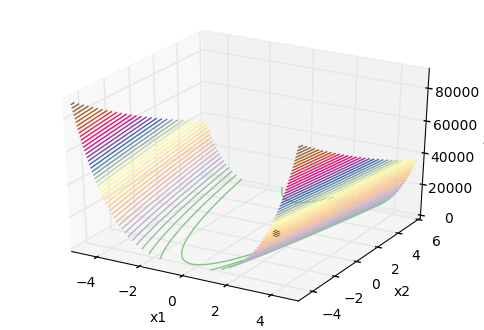

In [17]:
drawer2.draw_3D_graph(-5,5,-5,6,150, 'Accent')

In [18]:
from FIVOA.Constraints import *

In [19]:
explicit_constraint_on_X1 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)
explicit_constraint_on_X2 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)

explicit_constraints = [explicit_constraint_on_X1, explicit_constraint_on_X2]

equality_implicit_constraints = [EqualityImplicitConstraint4.EqualityImplicitConstraint4()]
inequality_implicit_constraints = [InequalityImplicitConstraint1.InequalityImplicitConstraint1(), InequalityImplicitConstraint2.InequalityImplicitConstraint2()]

In [20]:
drawer3 = Drawer.Drawer()
drawer3.add_function(f1)
drawer3.add_point(test_point_rosenbrock_optimum)
drawer3.add_constraint(inequality_implicit_constraints[0])
drawer3.add_constraint(inequality_implicit_constraints[1])

(<class 'FIVOA.Constraints.InequalityImplicitConstraint1.InequalityImplicitConstraint1'>, <class 'FIVOA.Constraints.IInequalityImplicitConstraint.IInequalityImplicitConstraint'>, <class 'FIVOA.Constraints.IImplicitConstraint.IImplicitConstraint'>, <class 'FIVOA.Constraints.IConstraint.IConstraint'>, <type 'object'>)
False
moje ime je FIVOA.Constraints.InequalityImplicitConstraint1InequalityImplicitConstraint1
<class 'FIVOA.Constraints.InequalityImplicitConstraint1.InequalityImplicitConstraint1'>
<class 'FIVOA.Constraints.InequalityImplicitConstraint1.InequalityImplicitConstraint1'>
False
[[nan, 86079.819747949368, 82264.186934729121, 78585.546974321842, 75040.393973669314, 71625.270732672274, 68336.768744190806, 65171.528194044025, 62126.237961010251, 59197.635616826919, 56382.507426190576, 53677.688346756979, 51080.062029141001, 48586.560816916593, 46194.165746616927, 43899.906547734296, 41700.861642720149, 39594.158146985064, 37576.971868898734, 35646.527309790043, 33800.097663946966

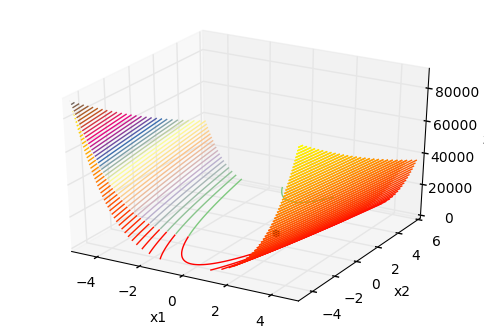

In [21]:
drawer3.draw_3D_graph(-5,5,-5,6,150, 'Accent')

In [22]:
isinstance(inequality_implicit_constraints[1], IInequalityImplicitConstraint.IInequalityImplicitConstraint)

True

---
Run an algorithm and then show an interactive visualization of its steps

In [23]:
from FIVOA.Algorithms import *

In [24]:
EPSILON = 1E-6
ALPHA = 1
BETA = 0.5
GAMMA = 2
SIGMA = 0.5
PRINT = True

In [28]:
f1 = F1RosenbrockBananaFunction.F1RosenbrockBananaFunction()
point = Point.Point(2, [-1.9, 2])

explicit_constraint_on_X1 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)
explicit_constraint_on_X2 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)
explicit_constraints = [explicit_constraint_on_X1, explicit_constraint_on_X2]

implicit_constraint_1 = InequalityImplicitConstraint1.InequalityImplicitConstraint1()
implicit_constraint_2 = InequalityImplicitConstraint2.InequalityImplicitConstraint2()
#implicit_constraint_3 = EqualityImplicitConstraint4.EqualityImplicitConstraint4()

implicit_constraints = [implicit_constraint_1,implicit_constraint_2]

In [29]:
box_algorithm = BoxAlgorithm.BoxAlgorithm(f1, explicit_constraints, implicit_constraints, EPSILON, ALPHA, PRINT)

In [30]:
solution_box, logger_box = box_algorithm.run(point)

<Point.Point instance at 0x000000000A957E88>


In [31]:
animator = Animator.Animator()